# Visualizing Airline Reviews on a 2D Plot

Instructor: Lin Lu

This notebook is divided into two parts:
1. data loading and topic modeling
2. visualization with t-SNE

Part 1: data loading and topic modeling

In [1]:
# data wrangling packages
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import random 
random.seed(13)

# visualization packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# read the reviews from the csv file
# reviews were originally scraped from Skytrax: https://www.airlinequality.com/airline-reviews/american-airlines/
df = pd.read_csv("AA_Reviews.csv")
df.head()

,ID,rating,score,title,author_loc,author,year,comment,d_verify
0,1,3/10,3.0,"""will not do it again""",M Calder (United States) 4th July 2018,M Calder,2018,Denver to Gatwick via Orlando. Worst experienc...,Trip Verified
1,2,1/10,1.0,"""was just a disaster""",Loay Osman (United Arab Emirates) 4th July 2018,Loay Osman,2018,Chicago to New York. After all the hassle with...,Trip Verified
2,3,1/10,1.0,"""the world’s worst airline""",Paul Spano (United States) 3rd July 2018,Paul Spano,2018,Flew Bristol to Charlotte. As usual American A...,Trip Verified
3,4,1/10,1.0,"""worst flight experience""",B Meares (Canada) 3rd July 2018,B Meares,2018,Cancun to Montreal via Philadelphia. Extremely...,Trip Verified
4,5,10/10,10.0,"""professional, pleasant and fun crew""",W Nelson (United States) 3rd July 2018,W Nelson,2018,Rome to Detroit via Philadelphia. I’ve had my ...,Trip Verified


In [3]:
# the size of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 9 columns):
ID            2157 non-null int64
rating        2157 non-null object
score         2152 non-null float64
title         2157 non-null object
author_loc    2157 non-null object
author        2157 non-null object
year          2157 non-null int64
comment       2157 non-null object
d_verify      418 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 151.7+ KB


In [4]:
n_features = 1000  # number of words used as features for clustering
n_topics = 6    # number of topics we want to cluster the reviews
n_top_words = 15  # number of top words shown in each cluster

# print the top words of each cluster
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=n_features,stop_words='english')

# tfidf are in form of <2157x1000 sparse matrix of type '<class 'numpy.float64'>'
tfidf = tfidf_vectorizer.fit_transform(df['comment'])

nmf = NMF(n_components=n_topics, random_state=0,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

print("Topics found via NMF:")

# a list of 1000 features in tfidf
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topics found via NMF:

Topic #0:
flight time plane american hour airlines hours minutes delayed gate got wait late took waiting

Topic #1:
food service good seat seats class cabin new crew aa entertainment friendly comfortable jfk staff

Topic #2:
check rude bag american airlines told said ticket luggage people asked pay checked gate service

Topic #3:
american airlines flight service time fly airline worst flights staff customer rude experience flew times

Topic #4:
day customer told airport service hotel aa morning cancelled ticket night flight called home said

Topic #5:
seats seat flight plane paid extra way row fly uncomfortable pay told old booked just



In [5]:
print(tfidf)
tfidf

  (0, 264)	0.12502291740963337
  (0, 623)	0.24047824461073425
  (0, 989)	0.039359751647454526
  (0, 330)	0.03251518226595455
  (0, 368)	0.1755024275707821
  (0, 918)	0.07664698712071433
  (0, 132)	0.08300486382785993
  (0, 362)	0.029209273987715556
  (0, 239)	0.0590694716299904
  (0, 103)	0.2981295303986965
  (0, 513)	0.040583207470841966
  (0, 467)	0.06011956115268356
  (0, 848)	0.05422973138573078
  (0, 360)	0.03618308835075856
  (0, 227)	0.2755634053873442
  (0, 512)	0.09745121698800796
  (0, 361)	0.10931197046503337
  (0, 209)	0.10931050702581058
  (0, 81)	0.0745723689452451
  (0, 487)	0.03870256339559896
  (0, 896)	0.047987936728569734
  (0, 35)	0.04479189999374455
  (0, 127)	0.04033889658470731
  (0, 662)	0.055076035193855656
  (0, 129)	0.21731041365828865
  :	:
  (2156, 259)	0.11187348196043694
  (2156, 842)	0.11718123475031636
  (2156, 398)	0.35759178849363243
  (2156, 997)	0.1583931656479634
  (2156, 34)	0.1020011633957523
  (2156, 274)	0.11506018706890342
  (2156, 504)	0.1300

<2157x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 96228 stored elements in Compressed Sparse Row format>

In [6]:
# nmf_embedding will be in a form of 2157 * 6 array (W matrix)
nmf_embedding = nmf.transform(tfidf)
nmf_embedding = (nmf_embedding - nmf_embedding.mean(axis=0))/nmf_embedding.std(axis=0)

In [7]:
# np.argsort to find out the top 3 comments' titles in each cluster
# axis = 0, sort by columns/cluster
# argsort(), sort from small to large, returns the indices
# [-3:], return the last three rows
top_idx = np.argsort(nmf_embedding,axis=0)[-3:]

count = 0
# top_idx.T does a transpose on the top_idx
for idxs in top_idx.T: 
    print("\nTopic {}:".format(count))
    for idx in idxs:
        print(df.iloc[idx]['title'])
    count += 1


Topic 0:
"There was a major miscommunication"
"finally arrived over 7 hours late"
"disorganized and unapologetic"

Topic 1:
American Airlines customer review
"crew courteous and helpful"
"AA did good on this flight"

Topic 2:
"her attitude toward clients"
"spoken to like preschoolers"
"a disappointment"

Topic 3:
"never been on time when flying them"
"unsatisfactory customer service"
"rare that the flight is on time"

Topic 4:
"terrible experience, stay away"
"seats were sold to other travelers"
"hoops we have had to jump through"

Topic 5:
"paid money to be extremely uncomfortable"
"rude and disorganized"
"has gone downhill"


In [8]:
# assign the topic after reading the titles of the top comments in each cluster
topics = ['boarding',
          'facility',
          'luggage',
          'customer service',
          'flight',
          'seats'
         ]

Part 2: visualize the findings

In [9]:
# tsne - t-Distributed Stochastic Neighbor Embedding (preserve similarity in low dimension space)
tsne = TSNE(random_state=3211)
tsne_embedding = tsne.fit_transform(nmf_embedding)
tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])
tsne_embedding['hue'] = nmf_embedding.argmax(axis=1)
# # tsne_embedding is in a form of 2157 * 4 dataframe

In [46]:
tsne_embedding.shape

(2157, 2)

In [11]:
# RGB of colors
colors = np.array([[0.89411765, 0.10196078, 0.10980392, 1.        ],
 [0.21568627, 0.49411765, 0.72156863, 1.        ],
 [0.59607843, 0.30588235, 0.63921569, 1.        ],
 [1. , 1. , 0.2, 1. ],
 [0.96862745, 0.50588235, 0.74901961, 1.        ],
 [0.6, 0.6, 0.6, 1. ]])

legend_list = []

for i in range(len(topics)):   
    color = colors[i]
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

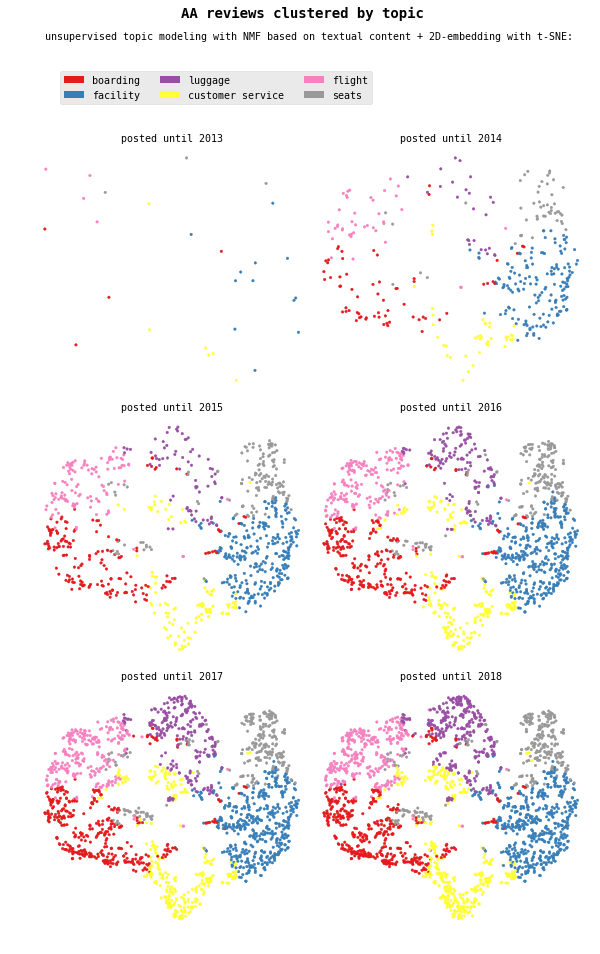

In [36]:
matplotlib.rc('font',family='monospace')
plt.style.use('ggplot')

# subplots in a form of 3 * 2
fig, axs = plt.subplots(3,2, figsize=(10, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=0)

axs = axs.ravel()

count = 0
legend = []
for year, idx in zip([2013,2014,2015,2016,2017,2018], range(6)):
    data = tsne_embedding[df['year']<=year]
    scatter = axs[idx].scatter(data=data,x='x',y='y',s=6,c=data['hue'],cmap="Set1")
    axs[idx].set_title('posted until {}'.format(year),**{'fontsize':'10'})
    axs[idx].axis('off')

plt.suptitle("AA reviews clustered by topic",**{'fontsize':'14','weight':'bold'})
plt.figtext(.51,0.95,'unsupervised topic modeling with NMF based on textual content + 2D-embedding with t-SNE:', **{'fontsize':'10','weight':'light'}, ha='center')


fig.legend(legend_list,topics,loc=(0.1,0.89),ncol=3)
plt.subplots_adjust(top=0.85)

plt.show()